<a href="https://colab.research.google.com/github/YazMRRS/FisicaComputacional1/blob/master/Evaluacion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las bibliotecas 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D

**Problema 1:**
Resuelva numéricamente la ecuación de reacción difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial ***u(x,0)=0***,  y condiciones a la frontera ***u(0,t)=1*** y ***u(1,t)=2***, para un tiempo ***t=0,...,1.***

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


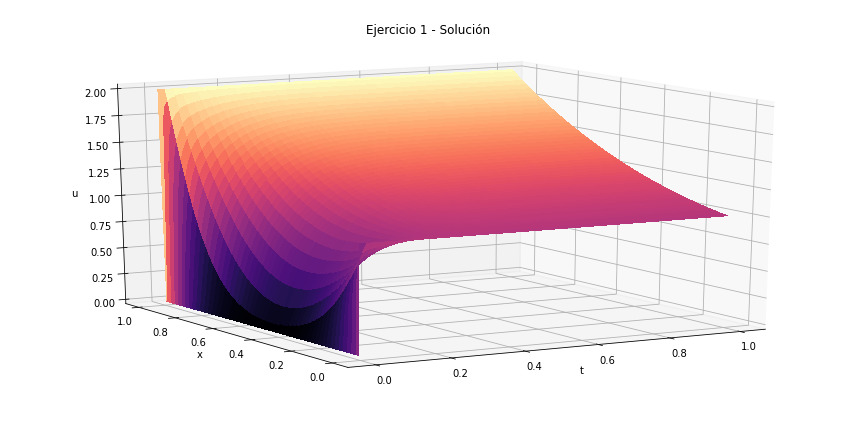

In [8]:
#Puntos en el espacio x
M=100
#Puntos en el tiempo t
N=200

#Discretización de x
x0=0
xL=1
dx=(xL-x0)/(M-1)

#Discretización de t
t0=0
tF=1
dt=(tF-t0)/(N-1)

#Coeficiente de difución
D=1
#Coeficiente de reacción 
alpha=-1

r=dt*D/dx**2
s=dt*alpha

#Malla
xspan=np.linspace(x0,xL,M)
tspan=np.linspace(t0,tF,N)

main_diag=(1+2*r-s)*np.ones((1,M-2))
off_diag=-r*np.ones((1,M-3))

a=main_diag.shape[1]

diagonals=[main_diag, off_diag, off_diag]

A=sparse.diags(diagonals,[0,-1,1], shape=(a,a)).toarray()

#Matriz de inicialización 
U=np.zeros((M,N))

#Condición inicial
U[:,0]=0.0

#Condiciones de frontera de Dirichlet
U[0,:]=1.0
U[-1,:]=2.0

for k in range(1,N):
  c=np.zeros((M-4,1)).ravel()
  b=np.asarray([r*U[0,k],r*U[-1,k]])
  b1=np.insert(b,1,c)
  b2=np.array(U[1:M-1,k-1])

  B=b1+b2

  U[1:M-1,k]=np.linalg.solve(A,B)

#Verificamos la solución
g=np.allclose(np.dot(A,U[1:M-1,N-1]),B)
print(g)

#Surface plot
X,T=np.meshgrid(tspan,xspan)
fig=plt.figure(figsize=(12,6))
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,T,U,linewidth=0,cmap=cm.magma,antialiased=False)

#Graficamos
ax.set_title('Ejercicio 1 - Solución')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
plt.tight_layout()
ax.view_init(elev=15,azim=-120)
plt.show()

**Problema 2:**
Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacio ***u(x,0)=0.*** En ***x=0***, el flujo de gas es $$\frac{\partial u}{\partial x}(0,t)=0.1$$ y en ***x=1*** el flujo $$\frac{\partial u}{\partial x}(1,t)=0.2$$

Se pide realizar una simulación numérica de este escenario para ***=0,..,10.

True


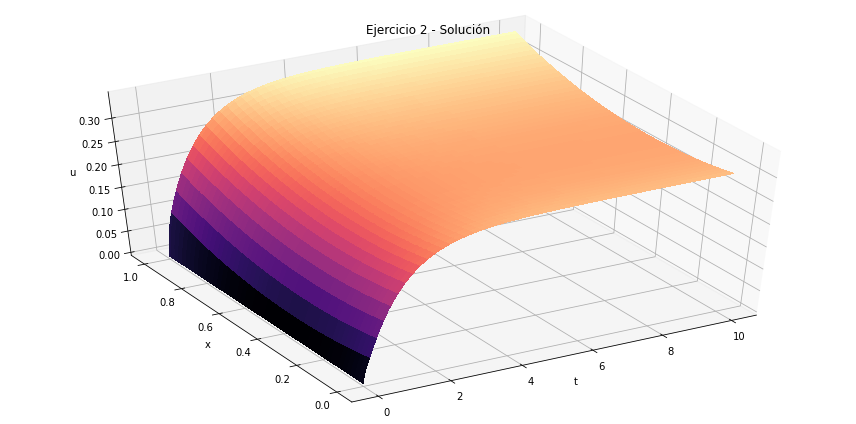

In [11]:
#Puntos en el espacio x
M=100
#Puntos en el tiempo t
N=300

#Discretización de x
x0=0
xL=1
dx=(xL-x0)/(M-1)

#Discretización de t
t0=0
tF=10
dt=(tF-t0)/(N-1)

#Coeficiente de difución
D=1
#Coeficiente de reacción 
alpha=-1

r=dt*D/dx**2
s=dt*alpha
p=1+2*r-s

#Malla
xspan=np.linspace(x0,xL,M)
tspan=np.linspace(t0,tF,N)

main_diag=p*np.ones((1,M))
off_diag=-r*np.ones((1,M-1))

a=main_diag.shape[1]

diagonals=[main_diag, off_diag, off_diag]

A=sparse.diags(diagonals,[0,-1,1], shape=(a,a)).toarray()
A[0,1]=-2*r
A[M-1,M-2]=-2*r

#Matriz de inicialización 
U=np.zeros((M,N))

#Condición inicial
U[:,0]=0.0

#Condiciones Neumann
f=np.ones([N+1,1])*0.1
g=np.ones([N+1,1])*0.2

for k in range(1,N):
  c=np.zeros((M-2,1)).ravel()
  b=np.asarray([2*r*dx*f[k],2*r*dx*g[k]])
  b1=np.insert(b,1,c)
  b2=np.array(U[0:M,k-1])

  B=b1+b2

  U[0:M,k]=np.linalg.solve(A,B)

#Verificamos la solución
gc=np.allclose(np.dot(A,U[0:M,N-1]),B)
print(gc)

#Surface plot
X,T=np.meshgrid(tspan,xspan)
fig=plt.figure(figsize=(12,6))
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,T,U,linewidth=0,cmap=cm.magma,antialiased=False)

#Graficamos
ax.set_title('Ejercicio 2 - Solución')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
plt.tight_layout()
ax.view_init(elev=45,azim=-120)
plt.show()

**Problema 3:**
¿Qué pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?

Suponga que inicialmente el tubo está vacío ***u(x,0)=0*** y la concentración en ***u(0,t)=1*** y ***u(1,t)=2***

Resuelva numéricamente este caso.

True


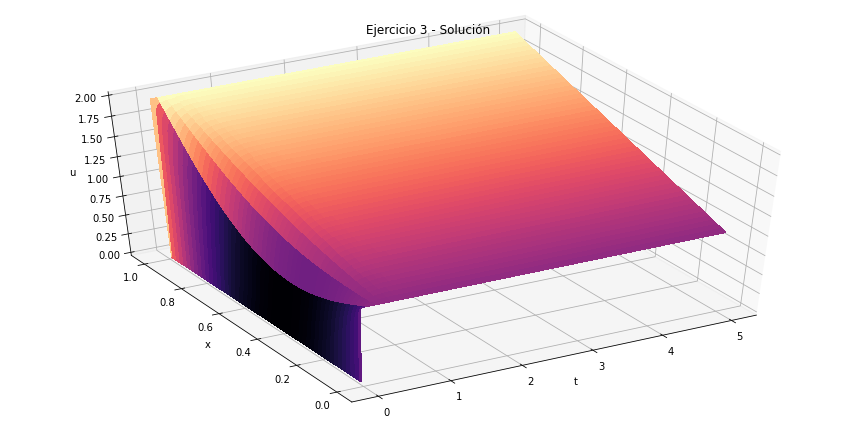

In [12]:
#Puntos en el espacio x
M=100
#Puntos en el tiempo t
N=200

#Discretización de x
x0=0
xL=1
dx=(xL-x0)/(M-1)

#Discretización de t
t0=0
tF=5
dt=(tF-t0)/(N-1)

#Coeficiente de difución
D=1
#Coeficiente de reacción 
alpha=0

r=dt*D/dx**2
s=dt*alpha

#Malla
xspan=np.linspace(x0,xL,M)
tspan=np.linspace(t0,tF,N)

main_diag=(1+2*r-s)*np.ones((1,M-2))
off_diag=-r*np.ones((1,M-3))

a=main_diag.shape[1]

diagonals=[main_diag, off_diag, off_diag]

A=sparse.diags(diagonals,[0,-1,1], shape=(a,a)).toarray()

#Matriz de inicialización 
U=np.zeros((M,N))

#Condición inicial
U[:,0]=0.0

#Condiciones de frontera de Dirichlet
U[0,:]=1.0
U[-1,:]=2.0

for k in range(1,N):
  c=np.zeros((M-4,1)).ravel()
  b=np.asarray([r*U[0,k],r*U[-1,k]])
  b1=np.insert(b,1,c)
  b2=np.array(U[1:M-1,k-1])

  B=b1+b2

  U[1:M-1,k]=np.linalg.solve(A,B)

#Verificamos la solución
g=np.allclose(np.dot(A,U[1:M-1,N-1]),B)
print(g)

#Surface plot
X,T=np.meshgrid(tspan,xspan)
fig=plt.figure(figsize=(12,6))
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,T,U,linewidth=0,cmap=cm.magma,antialiased=False)

#Graficamos
ax.set_title('Ejercicio 3 - Solución')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
plt.tight_layout()
ax.view_init(elev=45,azim=-120)
plt.show()

**Nota:** Como podemos notar, la grafica es muy parecida a la del problema 1. La diferencia radica en el coeficiente alpha. 